### **By:** Jorge Elias Sandon

###**Question 1.** Select the Tool

You can use the same tool you used when completing the module,
or choose a different one for your homework.

What's the name of the orchestrator you chose?

### **Question 2.** Version

What's the version of the orchestrator?


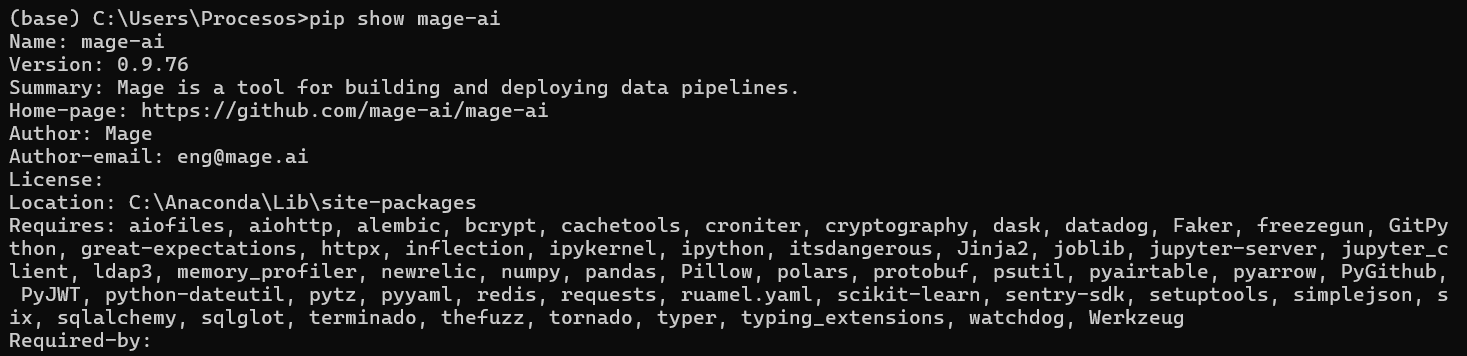

### **Question 3.** Creating a pipeline

Let's read the March 2023 Yellow taxi trips data.

How many records did we load?

- 3,003,766
- 3,203,766
- **3,403,766**
- 3,603,766

(Include a print statement in your code)

In [14]:
import pandas as pd

df = pd.read_parquet('/content/yellow_tripdata_2023-03.parquet')
print(len(df))


3403766


### **Solution**

* `3,403,766`

### **Question 4.** Data preparation

Let's continue with pipeline creation.

We will use the same logic for preparing the data we used previously.

This is what we used (adjusted for yellow dataset):

```python
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df
```

Let's apply to the data we loaded in question 3.

What's the size of the result?

- 2,903,766
- 3,103,766
- **3,316,216**
- 3,503,766

In [15]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

df = read_dataframe('/content/yellow_tripdata_2023-03.parquet')
print(len(df))

3316216


### **Solution**

* `3,316,216`

### **Question 5.** Train a model

We will now train a linear regression model using the same code as in homework 1.

* Fit a dict vectorizer.
* Train a linear regression with default parameters.
* Use pick up and drop off locations separately, don't create a combination feature.

Let's now use it in the pipeline. We will need to create another transformation block, and return both the dict vectorizer and the model.

What's the intercept of the model?

Hint: print the `intercept_` field in the code block

- 21.77
- 24.77
- 27.77
- 31.77


In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

y_train = df['duration'].values

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Intercepto: {lr.intercept_}')

Intercepto: 24.77203445209766


### **Solution**

* `24.77`

### **Question 6.** Register the model

The model is trained, so let's save it with MLFlow.

Find the logged model, and find MLModel file. What's the size of the model? (`model_size_bytes` field):

* 14,534
* 9,534
* 4,534
* 1,534


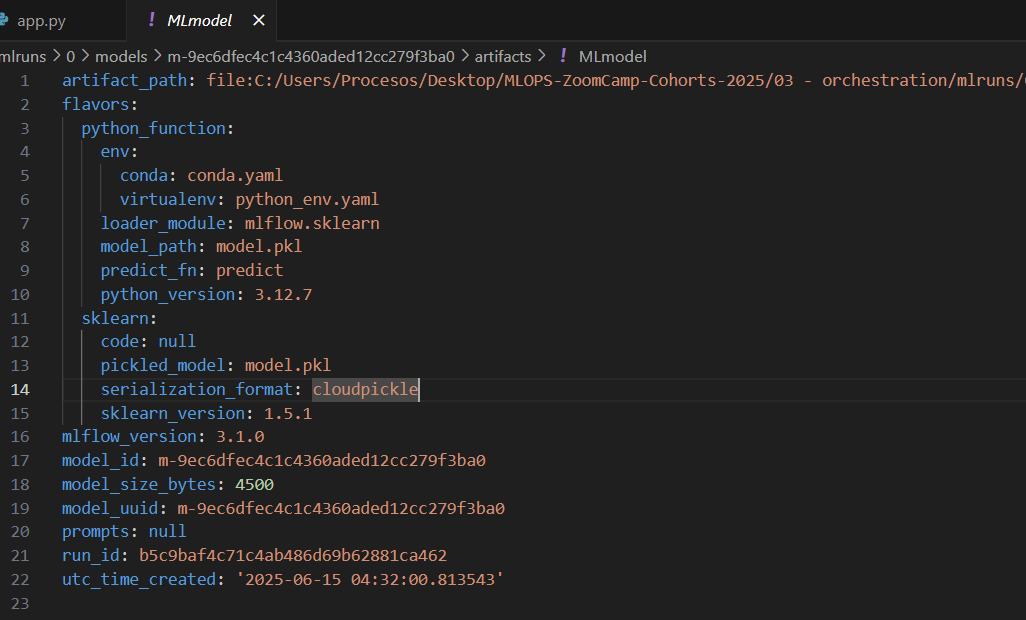

### **Solution**

* `4,534`